# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from math import sqrt
plt.style.use('fivethirtyeight')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [2]:
df_train = pd.read_csv('./Data/AdvWorksCusts.csv')
AW_AveMonthSpend = pd.read_csv('./Data/AW_AveMonthSpend.csv')
df_test = pd.read_csv('./Data/AW_test.csv')

In [3]:
df_train.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

In [5]:
df_train.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [6]:
df_train = pd.merge(df_train, AW_AveMonthSpend, on='CustomerID')
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,16739,16740,16741,16742,16743,16744,16745,16746,16747,16748
CustomerID,11000,11001,11002,11003,11004,11005,11006,11007,11008,11009,...,29473,29474,29475,29476,29477,29478,29479,29480,29481,29482
Title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth,Julio,Janet,Marco,Rob,Shannon,...,Carmen,Jaime,Jared,Elizabeth,Neil,Darren,Tommy,Nina,Ivan,Clayton
MiddleName,V,L,NaN,NaN,NaN,NaN,G,NaN,NaN,C,...,J,B,A,NaN,N,D,L,W,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson,Ruiz,Alvarez,Mehta,Verhoff,Carlson,...,Subram,Raje,Ward,Bradley,Ruiz,Carlson,Tang,Raji,Suri,Zhang
Suffix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle,7305 Humphrey Drive,2612 Berry Dr,942 Brook Street,624 Peabody Road,3839 Northgate Road,...,6467 Buena Vista,Potsdamer Straße 646,Erftplatz 876,Nonnendamm 2,P.O. Box 9178,5240 Premier Pl.,"111, rue Maillard",9 Katherine Drive,Knaackstr 4,"1080, quai de Grenelle"
AddressLine2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong,East Brisbane,Matraville,Warrnambool,Bendigo,Hervey Bay,...,Oxford,Saarbrücken,Hamburg,Hamburg,London,Stoke-on-Trent,Versailles,London,Hof,Saint Ouen
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales,Queensland,New South Wales,Victoria,Victoria,Queensland,...,England,Saarland,Hamburg,Hamburg,England,England,Yveline,England,Bayern,Charente-Maritime


In [7]:
##convert birthDate to datetime format
df_train['BirthDate'] = pd.to_datetime(df_train['BirthDate'])
df_test['BirthDate'] = pd.to_datetime(df_test['BirthDate'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16749 entries, 0 to 16748
Data columns (total 24 columns):
CustomerID              16749 non-null int64
Title                   88 non-null object
FirstName               16749 non-null object
MiddleName              9696 non-null object
LastName                16749 non-null object
Suffix                  2 non-null object
AddressLine1            16749 non-null object
AddressLine2            281 non-null object
City                    16749 non-null object
StateProvinceName       16749 non-null object
CountryRegionName       16749 non-null object
PostalCode              16749 non-null object
PhoneNumber             16749 non-null object
BirthDate               16749 non-null datetime64[ns]
Education               16749 non-null object
Occupation              16749 non-null object
Gender                  16749 non-null object
MaritalStatus           16749 non-null object
HomeOwnerFlag           16749 non-null int64
NumberCarsOwned      

In [8]:
df_train['birth_year'] = df_train['BirthDate'].map(lambda value: value.year)
df_train['Age'] = 1998 - df_train['birth_year']
df_test['birth_year'] = df_test['BirthDate'].map(lambda value: value.year)
df_test['Age'] = 1998 - df_test['birth_year']
df_train.head().T

,0,1,2,3,4
CustomerID,11000,11001,11002,11003,11004
Title,NaN,NaN,NaN,NaN,NaN
FirstName,Jon,Eugene,Ruben,Christy,Elizabeth
MiddleName,V,L,NaN,NaN,NaN
LastName,Yang,Huang,Torres,Zhu,Johnson
Suffix,NaN,NaN,NaN,NaN,NaN
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land,1825 Village Pl.,7553 Harness Circle
AddressLine2,NaN,NaN,NaN,NaN,NaN
City,Rockhampton,Seaford,Hobart,North Ryde,Wollongong
StateProvinceName,Queensland,Victoria,Tasmania,New South Wales,New South Wales


In [9]:
print('Shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates(subset='CustomerID', keep='last')
print('Shape after removing duplicate rows:', df_train.shape)

Shape before removing duplicate rows: (16749, 26)
Shape after removing duplicate rows: (16749, 26)


In [10]:
## check for number of missing values
df_train.isnull().sum()

CustomerID                  0
Title                   16661
FirstName                   0
MiddleName               7053
LastName                    0
Suffix                  16747
AddressLine1                0
AddressLine2            16468
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
birth_year                  0
Age                         0
dtype: int64

In [11]:
# drop columns with too many missing values
df_train.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'birth_year', 'Age'],
      dtype='object')

In [12]:
print('train shape before droping features:', df_train.shape)
print('test shape before droping features:',df_test.shape)
df_train.dropna(axis=1, inplace=True)
df_test.dropna(axis=1, inplace=True)
print('train shape after droping features:',df_train.shape)
print('test shape after droping features:', df_test.shape)

train shape before droping features: (16749, 26)
test shape before droping features: (500, 25)
train shape after droping features: (16749, 22)
test shape after droping features: (500, 21)


In [13]:
df_train.head(2)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,birth_year,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,M,M,1,0,0,2,137947,89,1966,32
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,M,S,0,1,3,3,101141,117,1965,33


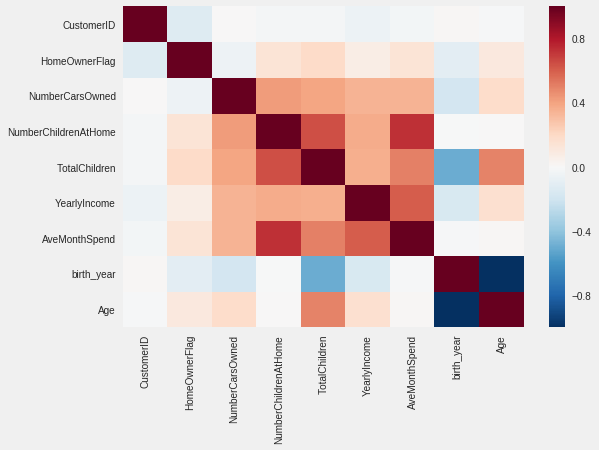

In [14]:
# show the correlation heatmap of the data to get a better sense of what we are looking at
sns.heatmap(df_train.corr())

In [15]:
## correlation among features
df_train.corr()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,birth_year,Age
CustomerID,1.000000,-0.126599,0.002115,-0.019848,-0.018416,-0.060852,-0.027446,0.010014,-0.010014
HomeOwnerFlag,-0.126599,1.000000,-0.053644,0.135171,0.188128,0.076076,0.135863,-0.109147,0.109147
NumberCarsOwned,0.002115,-0.053644,1.000000,0.424043,0.394739,0.344480,0.344670,-0.183488,0.183488
NumberChildrenAtHome,-0.019848,0.135171,0.424043,1.000000,0.647742,0.369181,0.730896,-0.003963,0.003963
TotalChildren,-0.018416,0.188128,0.394739,0.647742,1.000000,0.363084,0.500257,-0.492487,0.492487
YearlyIncome,-0.060852,0.076076,0.344480,0.369181,0.363084,1.000000,0.608288,-0.159733,0.159733
AveMonthSpend,-0.027446,0.135863,0.344670,0.730896,0.500257,0.608288,1.000000,-0.013571,0.013571
birth_year,0.010014,-0.109147,-0.183488,-0.003963,-0.492487,-0.159733,-0.013571,1.000000,-1.000000
Age,-0.010014,0.109147,0.183488,0.003963,0.492487,0.159733,0.013571,-1.000000,1.000000


In [16]:
## correlation between features and response/target variable
df_train.corr()['AveMonthSpend']

CustomerID             -0.027446
HomeOwnerFlag           0.135863
NumberCarsOwned         0.344670
NumberChildrenAtHome    0.730896
TotalChildren           0.500257
YearlyIncome            0.608288
AveMonthSpend           1.000000
birth_year             -0.013571
Age                     0.013571
Name: AveMonthSpend, dtype: float64

In [17]:
##birth year and age are the same thing. Hence, ther is need to remove the birth_year
df_train = df_train.drop('birth_year', axis=1)
df_test = df_test.drop('birth_year', axis=1)

In [18]:
df_train.head(2)

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,32
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,33


In [19]:
### the null accuracy of the target/response variable
df_train['AveMonthSpend'].value_counts(normalize=True)
## the null accuracy is 66%. i.e. 66% did not buy bike. We project to have an accuracy better than this

48     0.023225
52     0.022807
51     0.022449
49     0.022270
47     0.022031
50     0.021971
54     0.020180
46     0.020180
53     0.020061
45     0.018986
76     0.018449
75     0.018329
43     0.018150
77     0.017553
55     0.016897
70     0.016837
68     0.016479
73     0.016479
79     0.016299
74     0.016240
72     0.016120
56     0.015583
78     0.015225
57     0.015105
71     0.015046
66     0.014926
44     0.014628
65     0.014508
69     0.014389
64     0.014329
         ...   
132    0.001134
124    0.001134
138    0.001134
158    0.001015
128    0.001015
159    0.001015
167    0.001015
33     0.000955
144    0.000955
162    0.000896
163    0.000836
32     0.000776
169    0.000776
161    0.000716
166    0.000716
164    0.000657
170    0.000418
171    0.000358
29     0.000299
31     0.000299
172    0.000239
173    0.000239
26     0.000179
30     0.000179
25     0.000119
176    0.000119
174    0.000119
175    0.000119
24     0.000060
22     0.000060
Name: AveMonthSpend, Len

In [20]:
df_train.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'Age'],
      dtype='object')

In [21]:
## checking for categories
cat_col = ['City','StateProvinceName','CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique City 270
Number of unique StateProvinceName 52
Number of unique CountryRegionName 6
Number of unique Education 5
Number of unique Occupation 5
Number of unique Gender 2
Number of unique MaritalStatus 2
Number of unique HomeOwnerFlag 2
Number of unique NumberCarsOwned 5
Number of unique NumberChildrenAtHome 6
Number of unique TotalChildren 6
Number of unique Age 70


In [22]:
# unique features from each category
unique_cat_col = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
for cat in unique_cat_col:
    print(df_train[cat].unique())

['Australia' 'United States' 'Canada' 'Germany' 'United Kingdom' 'France']
['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
[1 0]
[0 1 4 2 3]
[0 3 5 4 1 2]
[2 3 0 5 4 1]
[32 33 30 34 35 19 20 53 52 51 50 21 23 22 49 48 18 47 46 45 44 25 43 42
 41 24 39 31 36 37 38 63 62 60 59 57 56 26 55 54 40 66 65 64 61 58 28 29
 27 68 67 72 74 88 71 70 69 76 87 86 78 77 85 82 81 75 79 73 80 83]


In [23]:
car_range = {0:'No car',1:'>=1 car',2:'>=1 car',3:'>=1 car',4:'>=1 car'}
children_range = {0:'No child',1:'>=1 child(ren)',2:'>=1 child(ren)',3:'>=1 child(ren)',4:'>=1 child(ren)',5:'>=1 child(ren)'}
total_children_range = {0:'No child',1:'>=1 child(ren)',2:'>=1 child(ren)',3:'>=1 child(ren)',4:'>=1 child(ren)',5:'>=1 child(ren)'}
age_range={18:'<=19',19:'<=19', 20:'<=29',21:'<=29',22:'<=29',23:'<=29',24:'<=29',25:'<=29',26:'<=29',27:'<=29',
           28:'<=29',29:'<=29', 30:'<=39',31:'<=39',32:'<=39',33:'<=39',34:'<=39',35:'<=39',36:'<=39',37:'<=39',
           38:'<=39',39:'<=39', 40:'<=49',41:'<=49',42:'<=49',43:'<=49',44:'<=49',45:'<=49',46:'<=49',47:'<=49',
           48:'<=49',49:'<=49', 50:'<=59',51:'<=59',52:'<=59',53:'<=59',54:'<=59',55:'<=59',56:'<=59',57:'<=59',
           58:'<=59',59:'<=59', 60:'<=89',61:'<=89',62:'<=89',63:'<=89',64:'<=89',65:'<=89',66:'<=89',67:'<=89',
           68:'<=89',69:'<=89', 70:'<=89',71:'<=89',72:'<=89',73:'<=89',74:'<=89',75:'<=89',76:'<=89',77:'<=89',
           78:'<=89',79:'<=89', 80:'<=89',81:'<=89',82:'<=89',83:'<=89',85:'<=89',86:'<=89',87:'<=89',88:'<=89'
          }
datasets=[df_train, df_test]
for dataset in datasets:
    dataset['Age']=dataset['Age'].replace(age_range)
    dataset['NumberCarsOwned'] = dataset['NumberCarsOwned'].replace(car_range)
    dataset['NumberChildrenAtHome'] = dataset['NumberChildrenAtHome'].replace(children_range)
    dataset['TotalChildren'] = dataset['TotalChildren'].replace(total_children_range)

In [24]:
df_train.head(3).T

,0,1,2
CustomerID,11000,11001,11002
FirstName,Jon,Eugene,Ruben
LastName,Yang,Huang,Torres
AddressLine1,3761 N. 14th St,2243 W St.,5844 Linden Land
City,Rockhampton,Seaford,Hobart
StateProvinceName,Queensland,Victoria,Tasmania
CountryRegionName,Australia,Australia,Australia
PostalCode,4700,3198,7001
PhoneNumber,1 (11) 500 555-0162,1 (11) 500 555-0110,1 (11) 500 555-0184
BirthDate,1966-04-08 00:00:00,1965-05-14 00:00:00,1965-08-12 00:00:00


# Visualizing Distributions

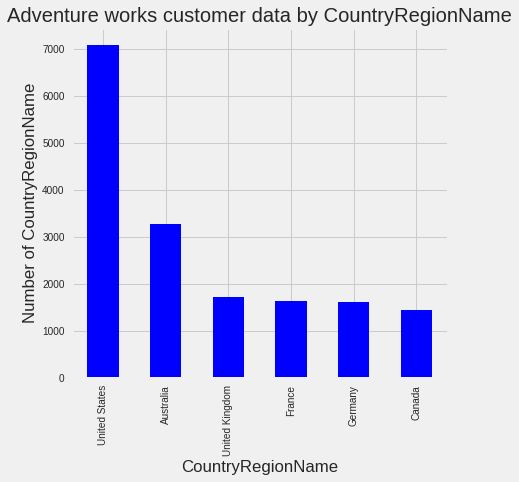

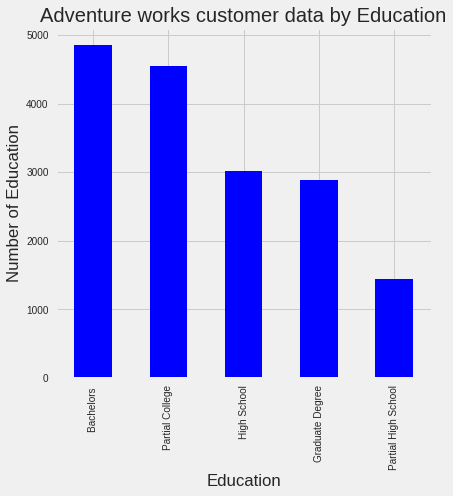

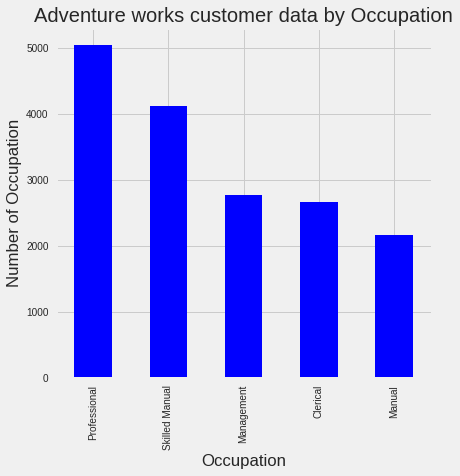

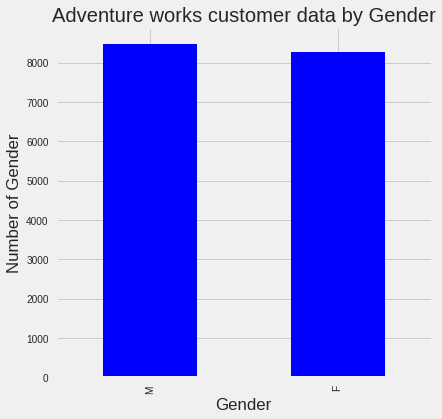

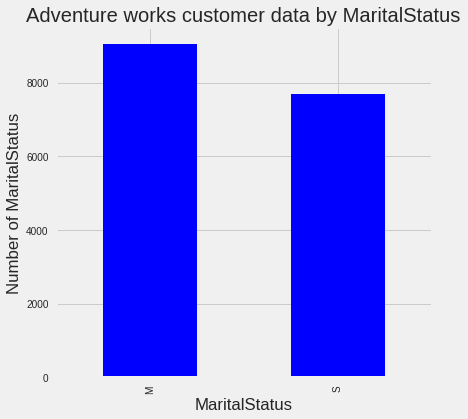

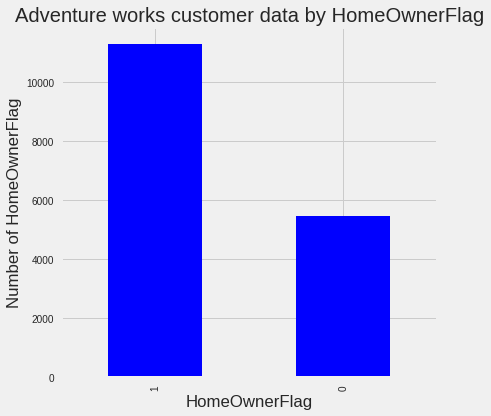

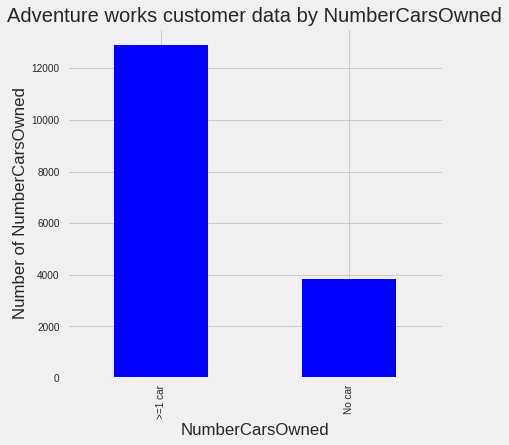

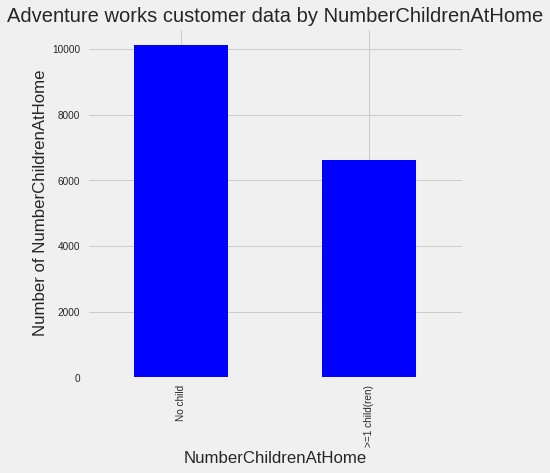

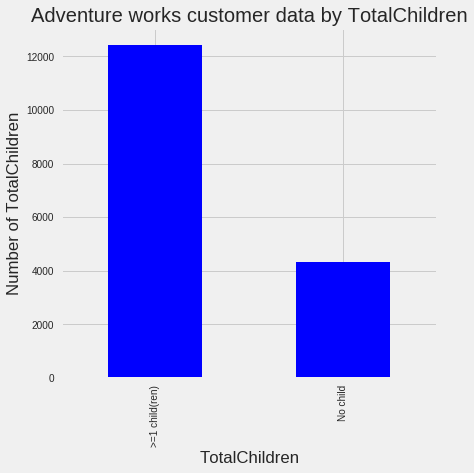

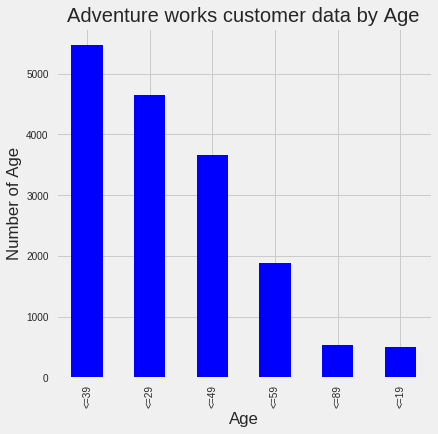

In [25]:
def plot_bars(df_train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df_train[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Adventure works customer data by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of ' + col)# Set text for y axis
        plt.show()
        
plot_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
plot_bars(df_train, plot_cols)    

# Categorical vs numeric variable

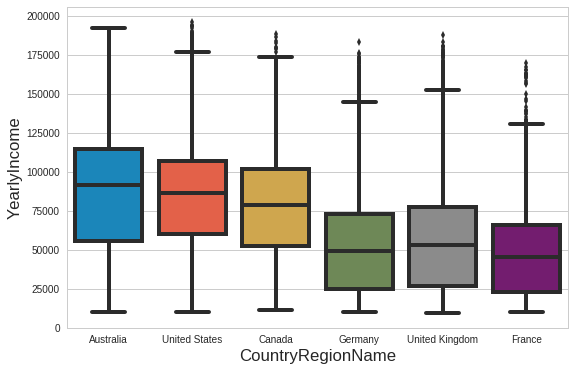

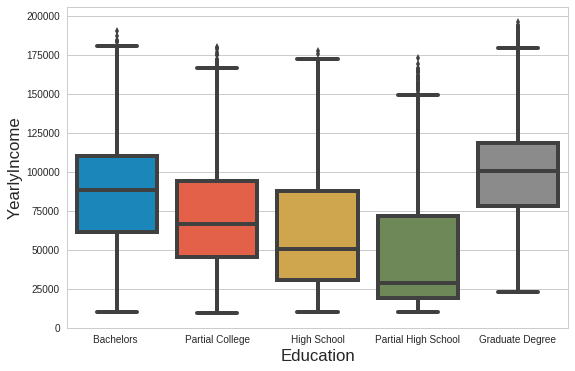

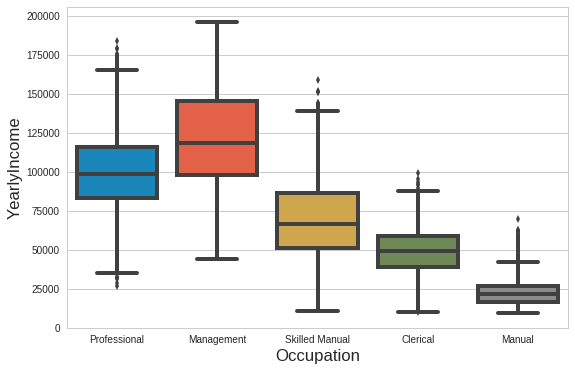

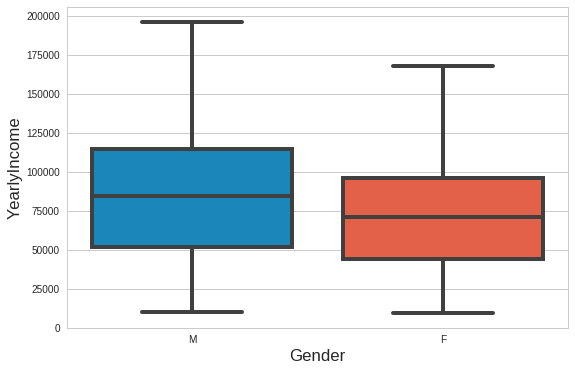

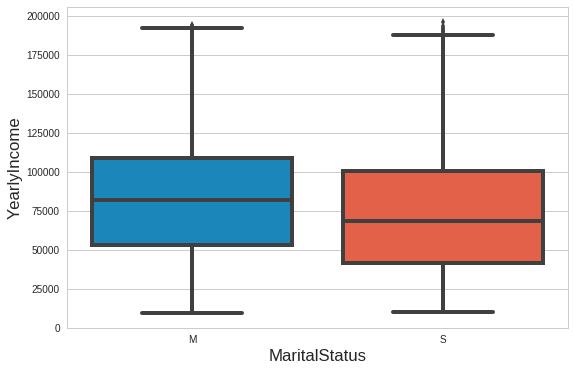

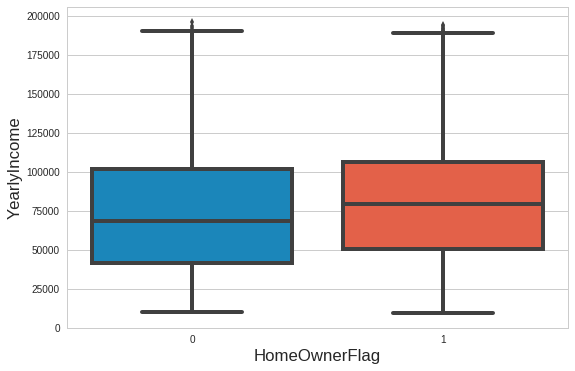

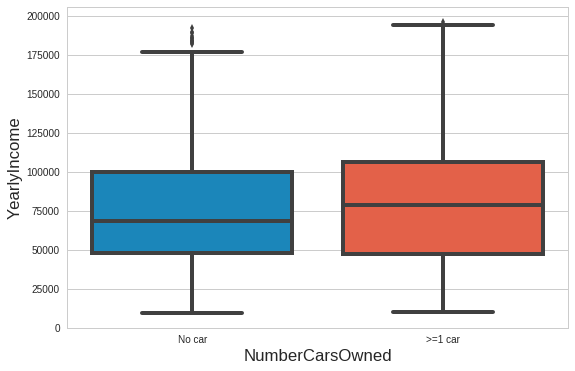

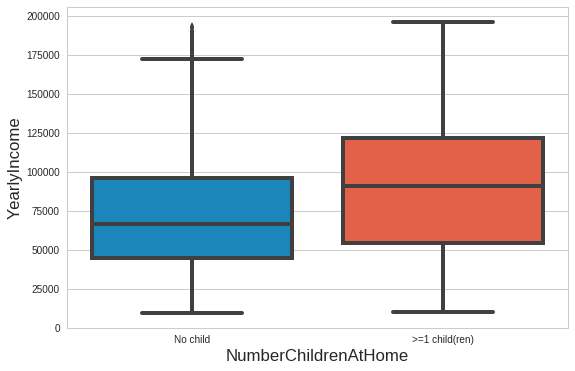

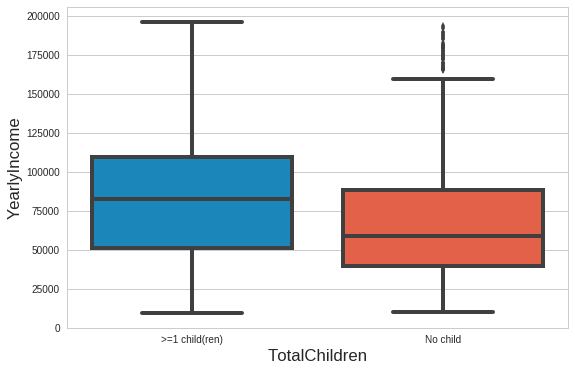

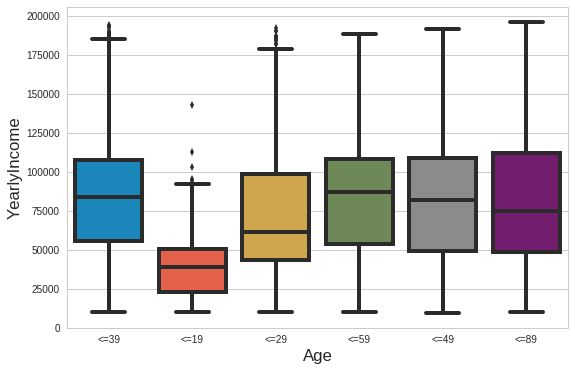

In [26]:
## relationship between the label (numeric variables) and the features (categorical variables)
def plot_box(df_train, cols, col_y = 'YearlyIncome'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
plot_box(df_train, cat_cols)    

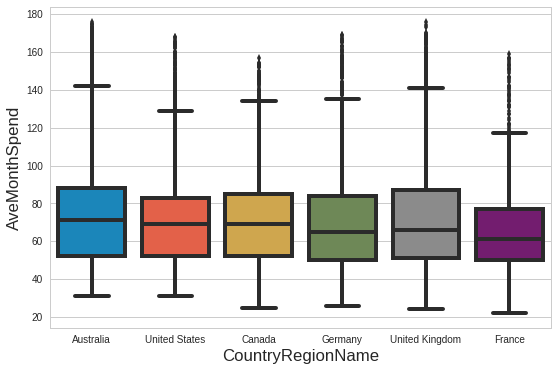

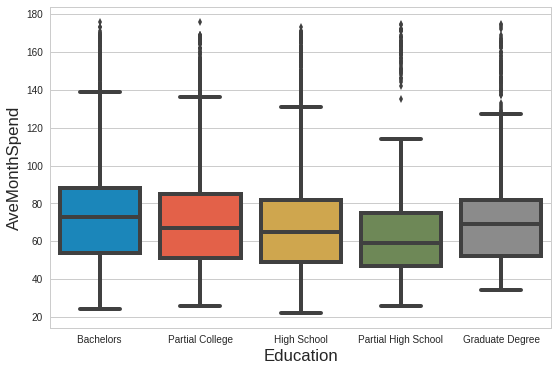

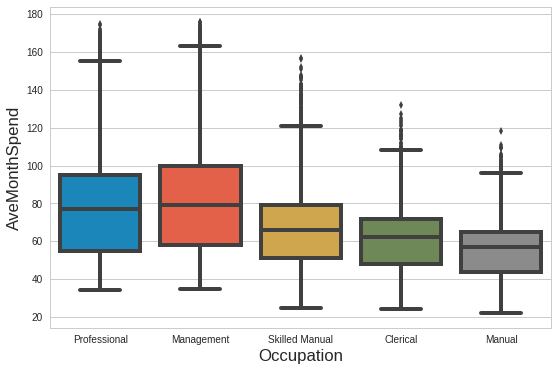

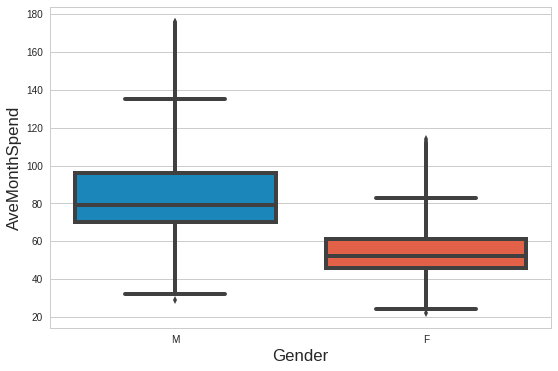

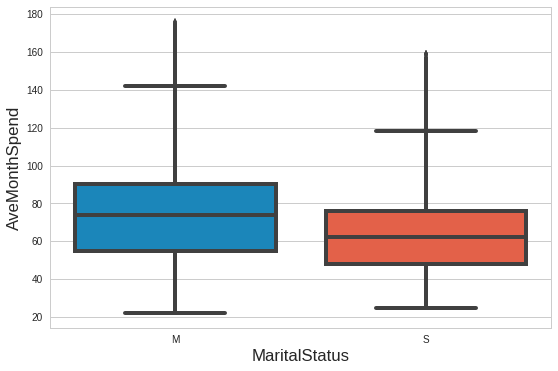

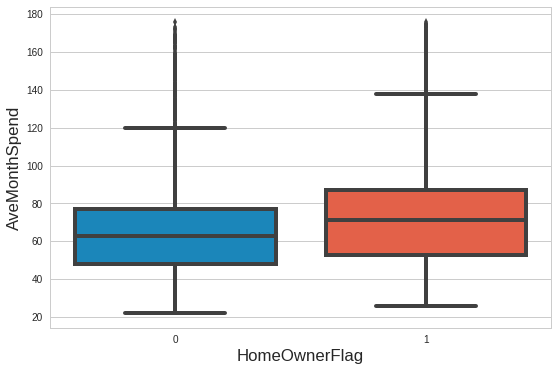

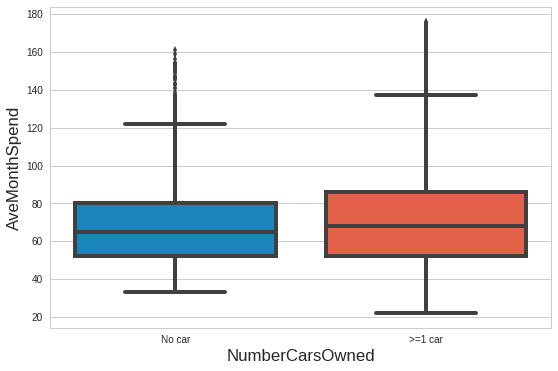

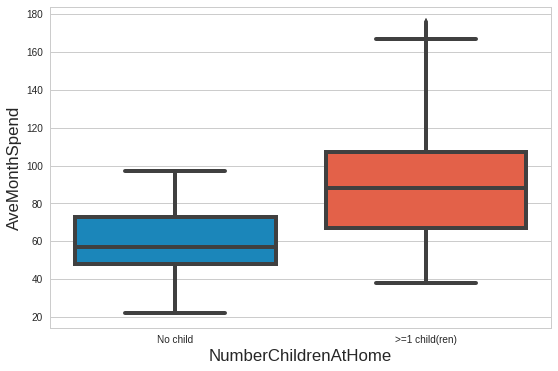

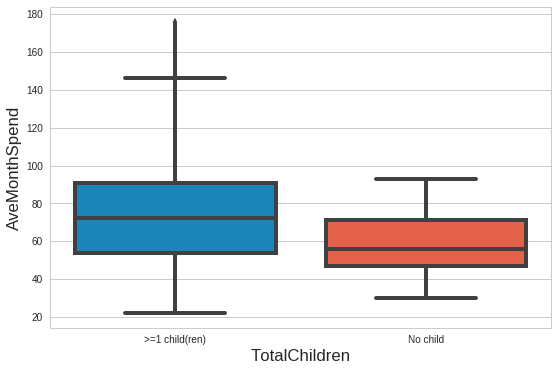

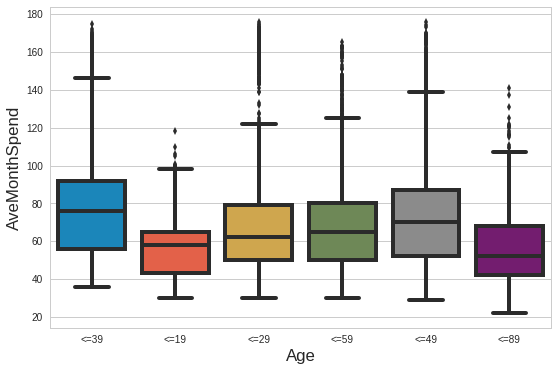

In [27]:
## relationship between the label (numeric variables) and the features (categorical variables)
def plot_box(df_train, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus',
           'HomeOwnerFlag','NumberCarsOwned','NumberChildrenAtHome','TotalChildren','Age']
plot_box(df_train, cat_cols)    

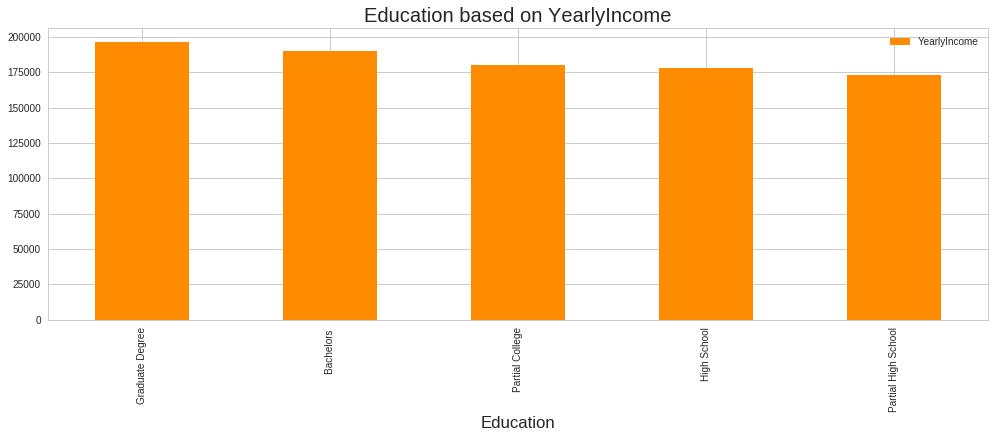

In [28]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('Education')[['YearlyIncome']].max().sort_values(
    'YearlyIncome', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Education based on YearlyIncome')

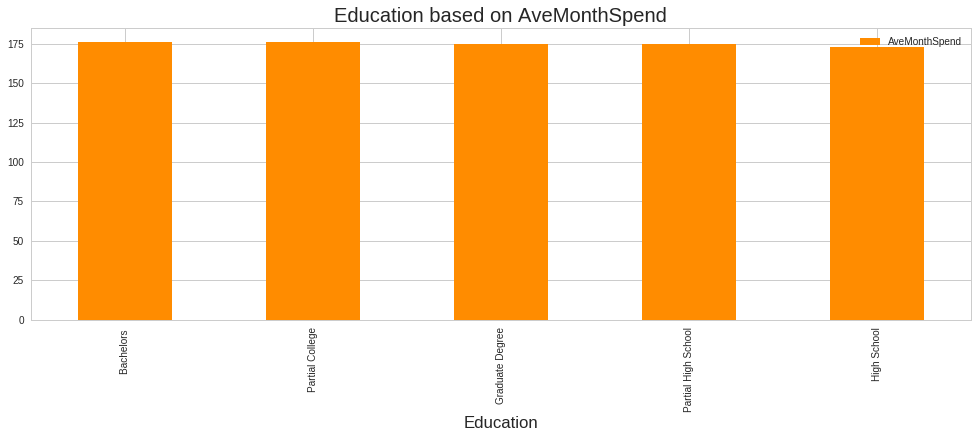

In [29]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('Education')[['AveMonthSpend']].max().sort_values(
    'AveMonthSpend', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Education based on AveMonthSpend')

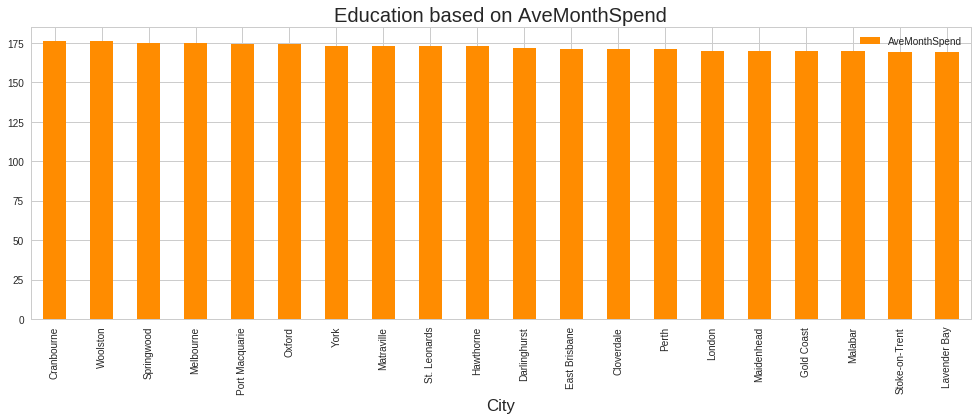

In [30]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('City')[['AveMonthSpend']].max().sort_values(
    'AveMonthSpend', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Education based on AveMonthSpend')

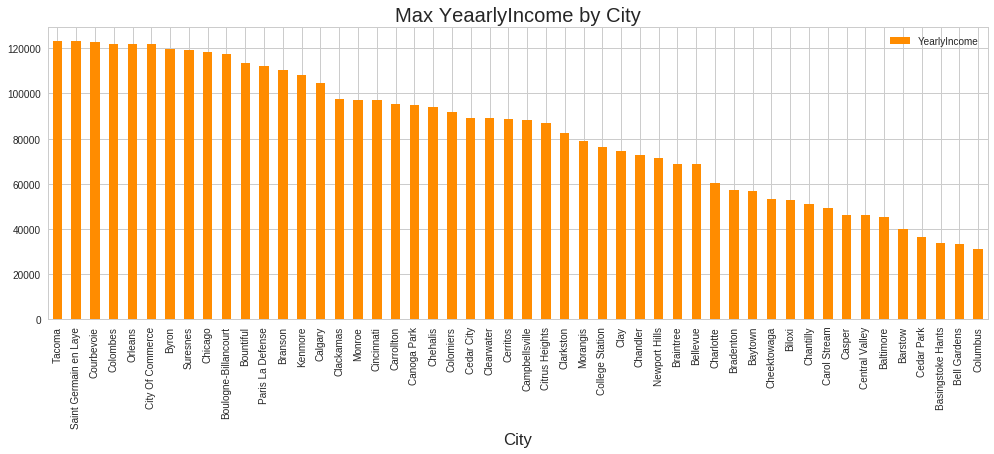

In [31]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('City')[['YearlyIncome']].max().sort_values(
    'YearlyIncome', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max YeaarlyIncome by City')

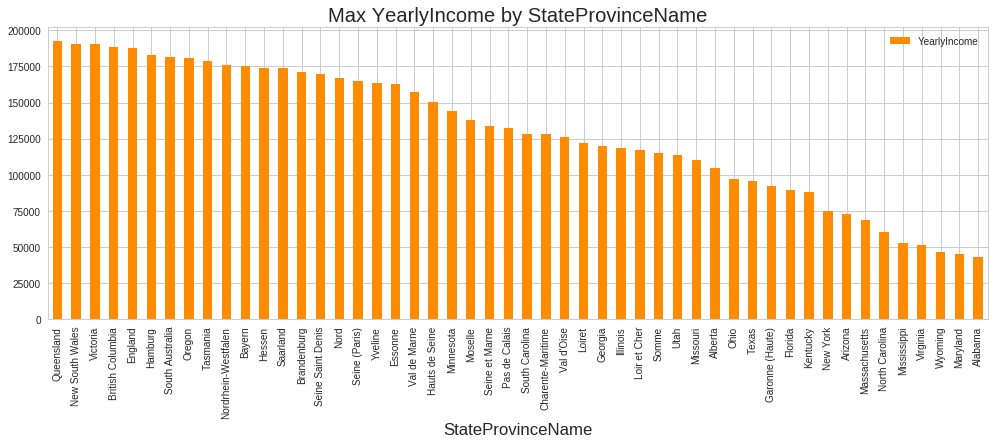

In [32]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('StateProvinceName')[['YearlyIncome']].max().sort_values(
    'YearlyIncome', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max YearlyIncome by StateProvinceName')

In [33]:
df_train.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'Age'],
      dtype='object')

In [34]:
train_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 
                   'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'Age']
test_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 
                   'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome','Age']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

In [35]:
train_data.head(5)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
0,Australia,Bachelors,Professional,M,M,1,No car,No child,>=1 child(ren),137947,89,<=39
1,Australia,Bachelors,Professional,M,S,0,>=1 car,>=1 child(ren),>=1 child(ren),101141,117,<=39
2,Australia,Bachelors,Professional,M,M,1,>=1 car,>=1 child(ren),>=1 child(ren),91945,123,<=39
3,Australia,Bachelors,Professional,F,S,0,>=1 car,No child,No child,86688,50,<=39
4,Australia,Bachelors,Professional,F,S,1,>=1 car,>=1 child(ren),>=1 child(ren),92771,95,<=39


In [36]:
print('shape of train data:',train_data.shape)
print('shape of test data:',test_data.shape)

shape of train data: (16749, 12)
shape of test data: (500, 11)


In [37]:
test_data.head(5)

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,United States,Bachelors,Management,F,S,0,>=1 car,No child,>=1 child(ren),86931,<=59
1,Canada,Bachelors,Skilled Manual,M,M,1,>=1 car,>=1 child(ren),>=1 child(ren),100125,<=39
2,United States,Graduate Degree,Management,F,M,1,>=1 car,No child,>=1 child(ren),103985,<=89
3,United States,Graduate Degree,Skilled Manual,M,M,1,No car,No child,>=1 child(ren),127161,<=49
4,France,High School,Manual,F,M,1,>=1 car,>=1 child(ren),>=1 child(ren),21876,<=39


In [38]:
## dummify categorical columns
cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 
        'NumberChildrenAtHome','TotalChildren', 'Age']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value

In [39]:
train.head(5).T

,0,1,2,3,4
HomeOwnerFlag,1,0,1,0,1
YearlyIncome,137947,101141,91945,86688,92771
AveMonthSpend,89,117,123,50,95
CountryRegionName__Australia,1,1,1,1,1
CountryRegionName__Canada,0,0,0,0,0
CountryRegionName__France,0,0,0,0,0
CountryRegionName__Germany,0,0,0,0,0
CountryRegionName__United Kingdom,0,0,0,0,0
CountryRegionName__United States,0,0,0,0,0
Education__Bachelors,1,1,1,1,1


In [40]:
print('Shape of train', train.shape)
print('Shape of test', test.shape)

Shape of train (16749, 35)
Shape of test (500, 34)


In [41]:
train.corr()['AveMonthSpend'] ## the correlation is not really strong
train.columns

Index(['HomeOwnerFlag', 'YearlyIncome', 'AveMonthSpend',
       'CountryRegionName__Australia', 'CountryRegionName__Canada',
       'CountryRegionName__France', 'CountryRegionName__Germany',
       'CountryRegionName__United Kingdom', 'CountryRegionName__United States',
       'Education__Bachelors ', 'Education__Graduate Degree',
       'Education__High School', 'Education__Partial College',
       'Education__Partial High School', 'Occupation__Clerical',
       'Occupation__Management', 'Occupation__Manual',
       'Occupation__Professional', 'Occupation__Skilled Manual', 'Gender__F',
       'Gender__M', 'MaritalStatus__M', 'MaritalStatus__S',
       'NumberCarsOwned__>=1 car', 'NumberCarsOwned__No car',
       'NumberChildrenAtHome__>=1 child(ren)',
       'NumberChildrenAtHome__No child', 'TotalChildren__>=1 child(ren)',
       'TotalChildren__No child', 'Age__<=19', 'Age__<=29', 'Age__<=39',
       'Age__<=49', 'Age__<=59', 'Age__<=89'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [43]:
features = ['HomeOwnerFlag', 'YearlyIncome','CountryRegionName__Australia', 'CountryRegionName__Canada',
       'CountryRegionName__France', 'CountryRegionName__Germany',
       'CountryRegionName__United Kingdom', 'CountryRegionName__United States',
       'Education__Bachelors ', 'Education__Graduate Degree',
       'Education__High School', 'Education__Partial College',
       'Education__Partial High School', 'Occupation__Clerical',
       'Occupation__Management', 'Occupation__Manual',
       'Occupation__Professional', 'Occupation__Skilled Manual', 'Gender__F',
       'Gender__M', 'MaritalStatus__M', 'MaritalStatus__S',
       'NumberCarsOwned__>=1 car', 'NumberCarsOwned__No car',
       'NumberChildrenAtHome__>=1 child(ren)',
       'NumberChildrenAtHome__No child', 'TotalChildren__>=1 child(ren)',
       'TotalChildren__No child', 'Age__<=19', 'Age__<=29', 'Age__<=39',
       'Age__<=49', 'Age__<=59', 'Age__<=89']

In [44]:
predicted_class_names=['AveMonthSpend']
X=train[features].values
y=train[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [45]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [46]:
colu = ['HomeOwnerFlag', 'YearlyIncome', 'CountryRegionName__Australia', 'CountryRegionName__Canada',
       'CountryRegionName__France', 'CountryRegionName__Germany',
       'CountryRegionName__United Kingdom', 'CountryRegionName__United States',
       'Education__Bachelors ', 'Education__Graduate Degree',
       'Education__High School', 'Education__Partial College',
       'Education__Partial High School', 'Occupation__Clerical',
       'Occupation__Management', 'Occupation__Manual',
       'Occupation__Professional', 'Occupation__Skilled Manual', 'Gender__F',
       'Gender__M', 'MaritalStatus__M', 'MaritalStatus__S',
       'NumberCarsOwned__>=1 car', 'NumberCarsOwned__No car',
       'NumberChildrenAtHome__>=1 child(ren)',
       'NumberChildrenAtHome__No child', 'TotalChildren__>=1 child(ren)',
       'TotalChildren__No child', 'Age__<=19', 'Age__<=29', 'Age__<=39',
       'Age__<=49', 'Age__<=59', 'Age__<=89']
test1=test[colu]

In [47]:
print(X_train.shape)
print(test1.shape)

(11724, 34)
(500, 34)


In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [49]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
regpred=reg.predict(X_train)
regpred_test=reg.predict(X_test)
print("Accuracy on training set:{:.7f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(reg.score(X_test, y_test)))

MSE= mean_squared_error(y_train, regpred)
MSE_test= mean_squared_error(y_test, regpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set:0.8429914
Accuracy on test set: 0.8396418
MSE: 117.35038767626125
MSE Test: 119.12737746829056
RMSE: 10.83283839426497
RMSE Test: 10.914548889820896


In [51]:
solution=reg.predict(test1)
np.savetxt('LinearRegressionMicrosoft.csv', solution, delimiter=',')

In [52]:
gbr=GradientBoostingRegressor (max_depth=5)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
print("Accuracy on training set: {:.7f}".format(gbr.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(gbr.score(X_test, y_test)))
gbrpred=gbr.predict(X_train)
gbrpred_test=gbr.predict(X_test)

MSE= mean_squared_error(y_train, gbrpred)
MSE_test= mean_squared_error(y_test, gbrpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.9505300
Accuracy on test set: 0.9410896
MSE: 36.974542052031396
MSE Test: 43.7635570473133
RMSE: 6.080669539781898
RMSE Test: 6.615403014731098


In [55]:
solution=gbr.predict(test1)
my_submission=pd.DataFrame({'CustomerID':df_test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('GradientBoostingMicrosoft.csv', index=False)

In [56]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(activation='tanh',hidden_layer_sizes=(100,100))
mlp.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [57]:
print("Accuracy on training set: {:.7f}".format(mlp.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(mlp.score(X_test, y_test)))
mlppred=mlp.predict(X_train)
mlppred_test=mlp.predict(X_test)

MSE= mean_squared_error(y_train, mlppred)
MSE_test= mean_squared_error(y_test, mlppred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.9660786
Accuracy on test set: 0.9553733
MSE: 25.35334469377605
MSE Test: 33.15244372339381
RMSE: 5.035210491506393
RMSE Test: 5.757815881338496


In [58]:
solution=mlp.predict(test1)
my_submission=pd.DataFrame({'CustomerID':df_test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('NeuralNetworkMicrosoft.csv', index=False)

In [59]:
rf=RandomForestRegressor(min_samples_leaf=5, max_features=1.0, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
print("Accuracy on training set: {:.7f}".format(rf.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(rf.score(X_test, y_test)))
rfpred=rf.predict(X_train)
rfpred_test=rf.predict(X_test)

MSE= mean_squared_error(y_train, rfpred)
MSE_test= mean_squared_error(y_test, rfpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.9640923
Accuracy on test set: 0.9429842
MSE: 26.837879805348024
MSE Test: 42.35604477711063
RMSE: 5.18052891173749
RMSE Test: 6.508152178392161


In [62]:
solution=rf.predict(test1)
my_submission=pd.DataFrame({'CustomerID':df_test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('RandomForestMicrosoft.csv', index=False)

In [63]:
from sklearn.svm import LinearSVR

In [64]:
svr = LinearSVR()
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [65]:
print("Accuracy on training set: {:.7f}".format(svr.score(X_train, y_train.ravel())))
print("Accuracy on test set: {:.7f}".format(svr.score(X_test, y_test)))
svrpred=svr.predict(X_train)
svrpred_test=svr.predict(X_test)

MSE= mean_squared_error(y_train, svrpred)
MSE_test= mean_squared_error(y_test, svrpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)

Accuracy on training set: 0.8135920
Accuracy on test set: 0.8119425
MSE: 139.32391347102498
MSE Test: 139.7047476451388
RMSE: 11.803555120006218
RMSE Test: 11.819676291893057


In [66]:
solution=svr.predict(test1)
my_submission=pd.DataFrame({'CustomerID':df_test.CustomerID,'AveMonthSpend': solution})
my_submission.to_csv('SVRMicrosoft.csv', index=False)